In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
#1)Consider only the below columns and prepare a prediction model for predicting Price
#dataset==ToyotaCorolla.csv
import pandas as pd
import numpy as np
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin-1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [ ]:
#!pip install statsmodels

In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [ ]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
list(df)

['Id',
 'Model',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar']

In [ ]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


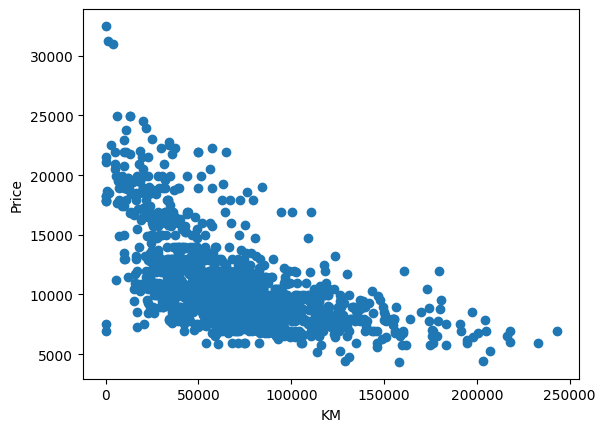

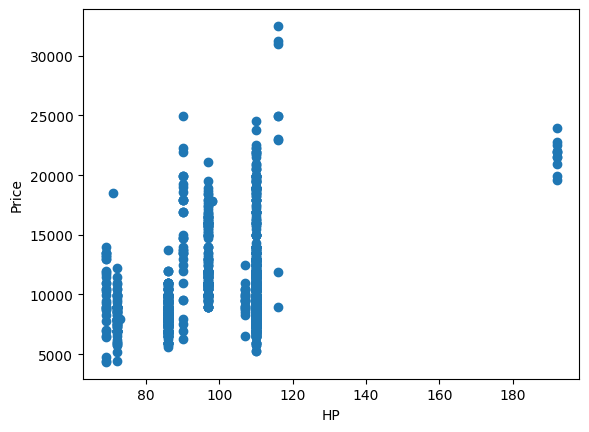

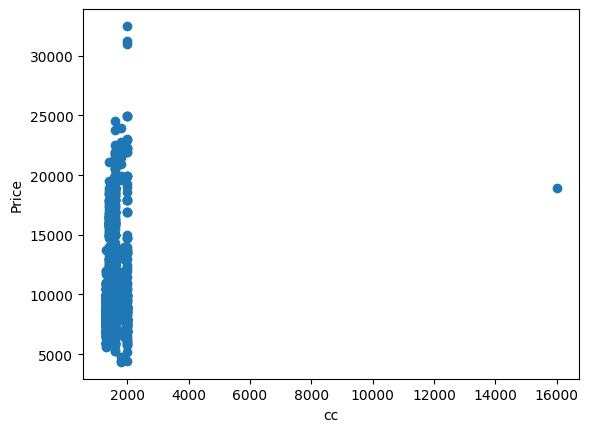

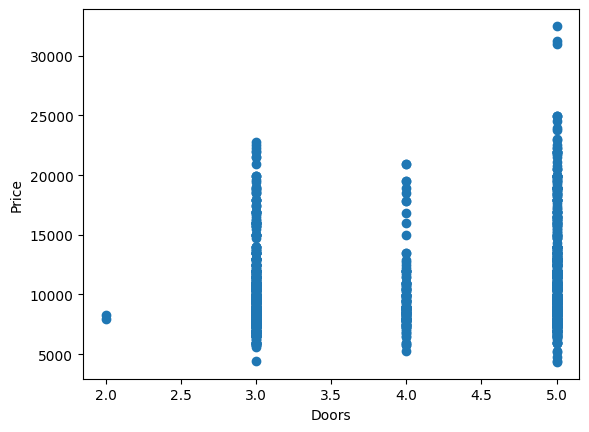

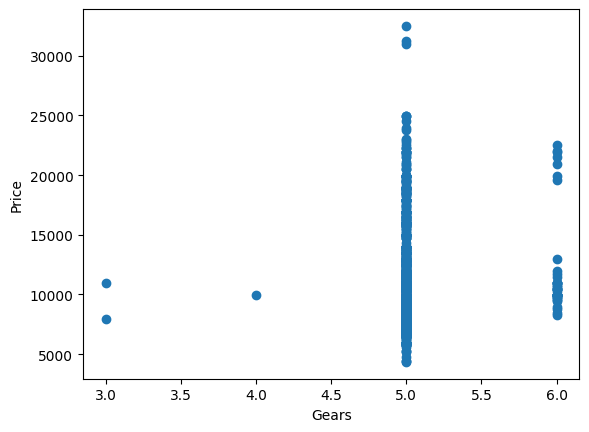

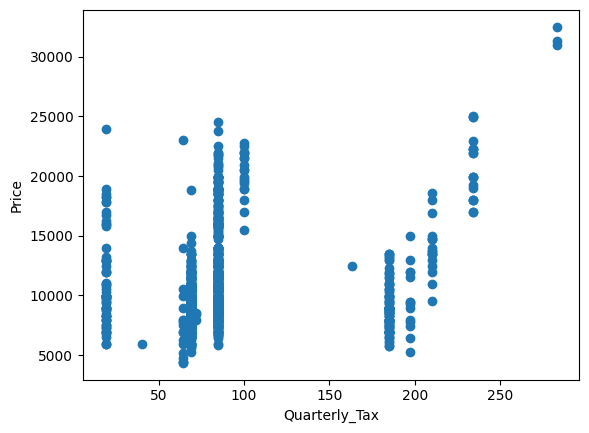

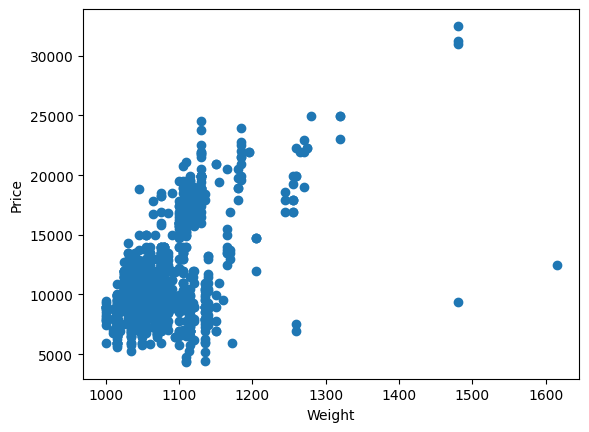

In [ ]:
# prompt: draw the scatter plot all the continous variables vs price

import matplotlib.pyplot as plt

continuous_variables = [ 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']

for variable in continuous_variables:
  plt.scatter(df[variable], df['Price'])
  plt.xlabel(variable)
  plt.ylabel('Price')
  plt.show()


In [ ]:
y = df["Price"] # fixed varaible we need to predict
x = df[['KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 2122.74
r square: 0.66


In [ ]:
x=df[['KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax']]


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 2451.59
r square: 0.54


In [ ]:
x=df[['KM', 'HP', 'cc', 'Doors', 'Gears']]


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 2812.37
r square: 0.4


In [ ]:
# prompt: code for mlr stats model for df

import statsmodels.api as sm

# Define the dependent and independent variables
y = df['Price']
X = df[continuous_variables]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the ordinary least squares regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     391.1
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:06:56   Log-Likelihood:                -13038.
No. Observations:                1436   AIC:                         2.609e+04
Df Residuals:                    1428   BIC:                         2.613e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.968e+04   2081.608    -14.258

In [ ]:
print("Mean square error : ",np.mean(model.resid ** 2))

Mean square error :  4506019.592009378


<Axes: >

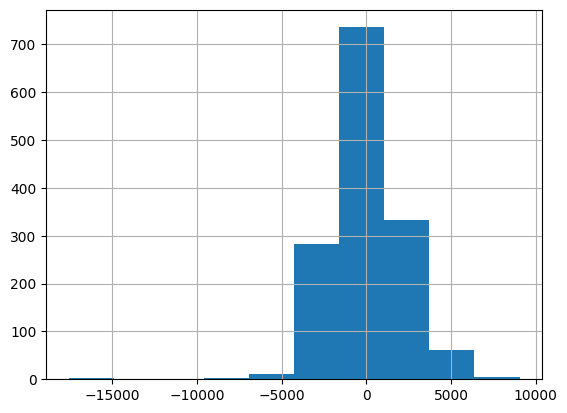

In [ ]:
model.resid.hist()

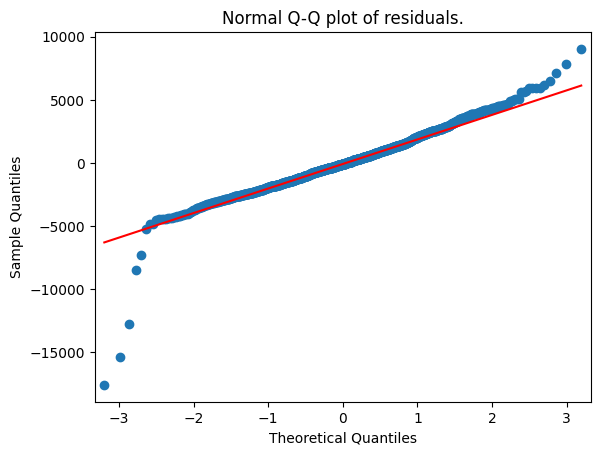

In [ ]:
#Resednitail analysis
#Test for normality

import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("Normal Q-Q plot of residuals.")
plt.show()
# please igone the warning

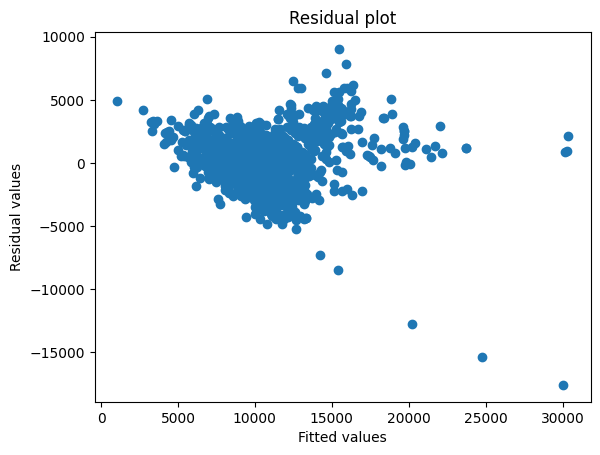

In [ ]:
# Residual plot..
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual plot")
plt.xlabel("Fitted values")
plt.ylabel("Residual values")
plt.show()

In [ ]:
# checking the model influence
model_influence = model.get_influence()
model_influence
(cooks,pvalue) = model_influence.cooks_distance
cooks = pd.DataFrame(cooks)
cooks[0].describe()


count    1.436000e+03
mean     4.641253e-02
std      1.664445e+00
min      8.585111e-10
25%      2.802932e-05
50%      1.439117e-04
75%      4.922591e-04
max      6.304961e+01
Name: 0, dtype: float64

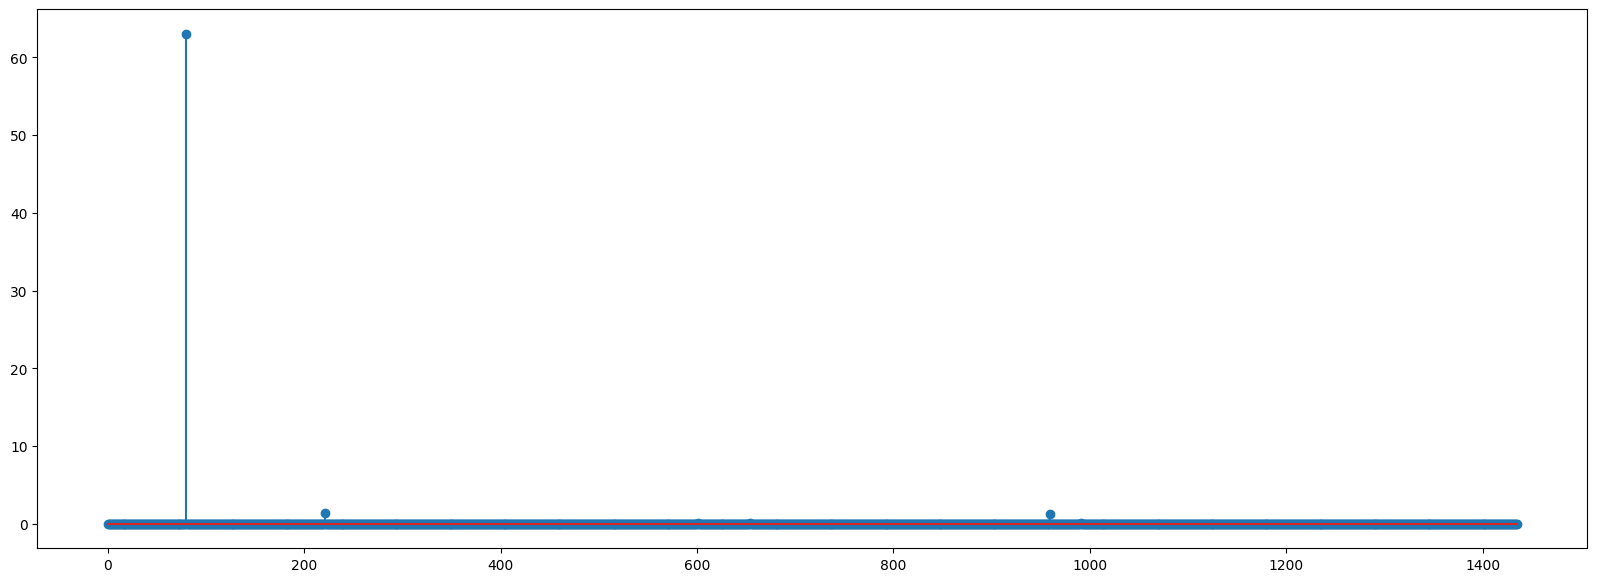

In [ ]:
# PLot the influence values..

fig = plt.subplots(figsize = (20 ,7))
plt.stem(np.arange(len(df)),np.round(cooks[0],3))
plt.xlabel = ("Row Index")
plt.ylabel = ("Cooks Distance")
plt.show()


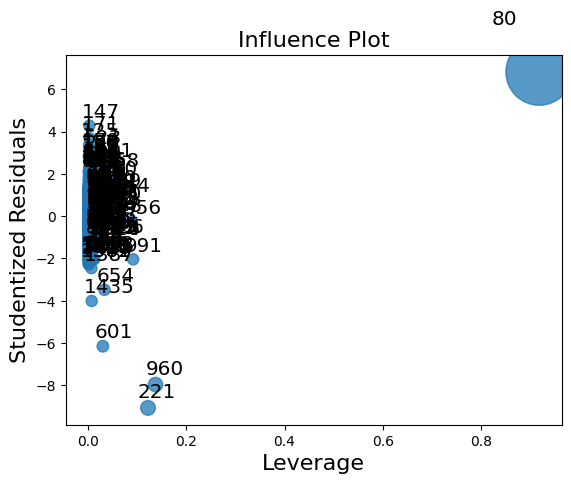

Leverage cutoff: 0.08147632311977715


In [ ]:
## High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
print("Leverage cutoff:",leverage_cutoff)

In [ ]:

from google.colab import files

uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
import pandas as pd
import numpy as np
df1=pd.read_csv('50_Startups.csv')
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df1.corr()

<ipython-input-6-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


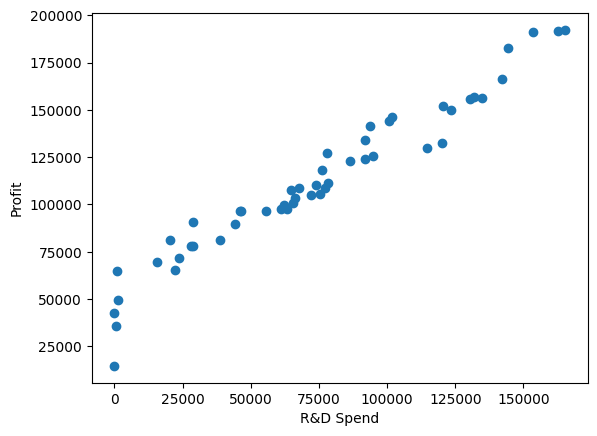

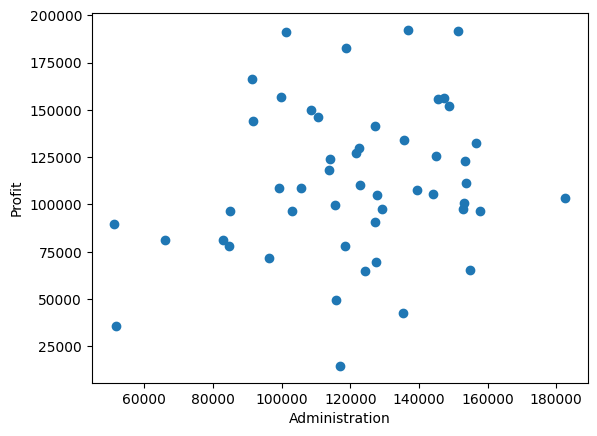

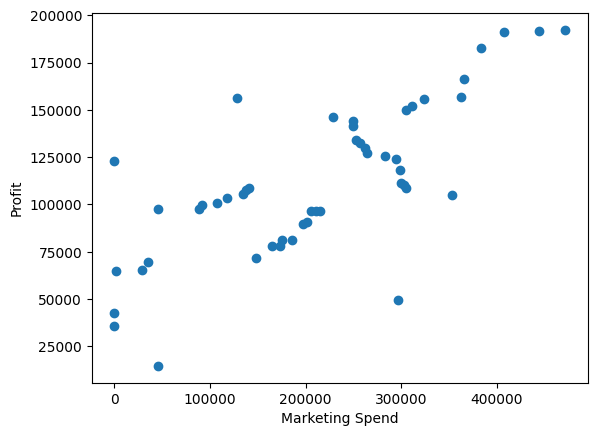

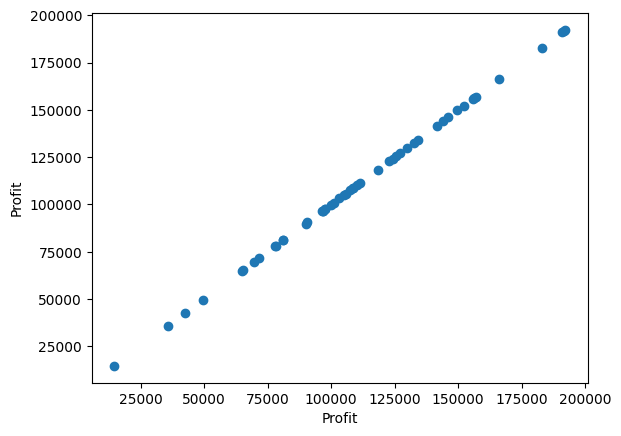

In [ ]:
# prompt: code for  the scatter plot df1 data set where profit is y and x is all columns except state

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df1 = pd.read_csv('50_Startups.csv')

# Create a scatter plot for each column in the dataset, with profit as the y-axis
for col in df1.columns:
    if col != 'State':
        plt.scatter(df1[col], df1['Profit'])
        plt.xlabel(col)
        plt.ylabel('Profit')
        plt.show()


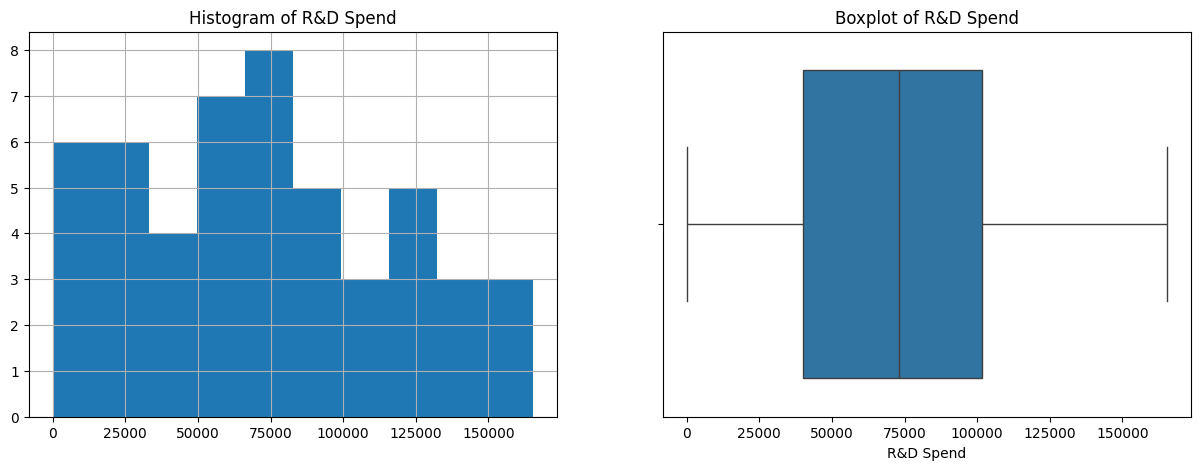

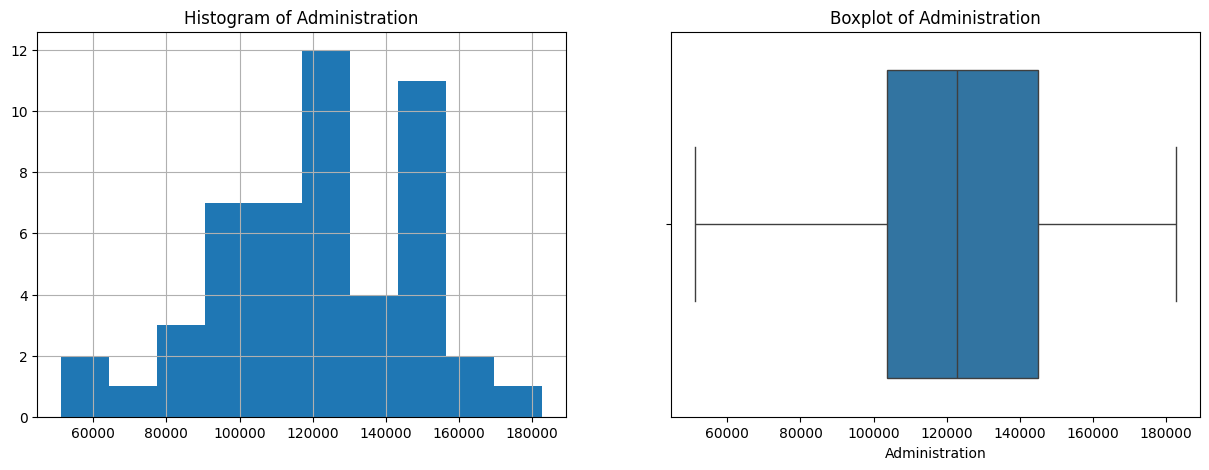

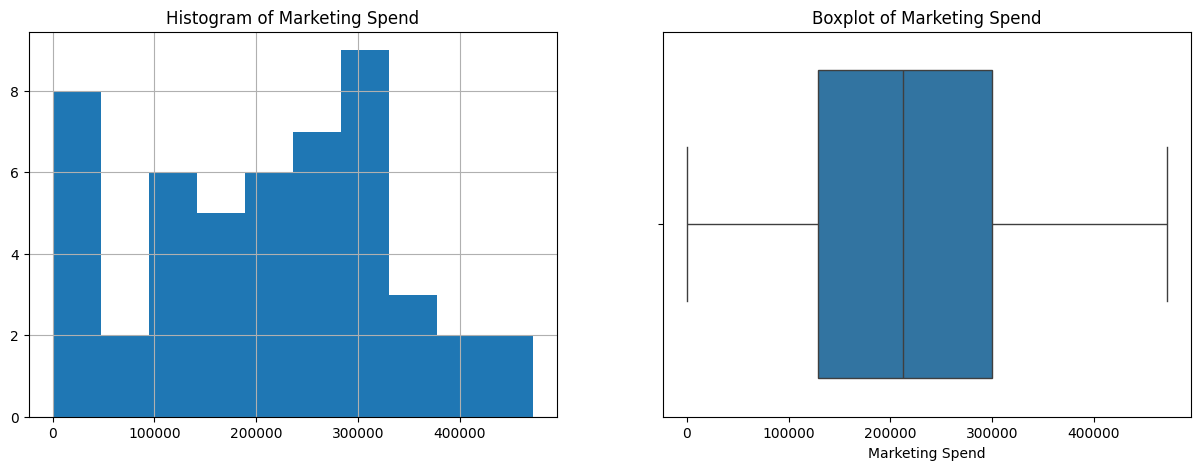

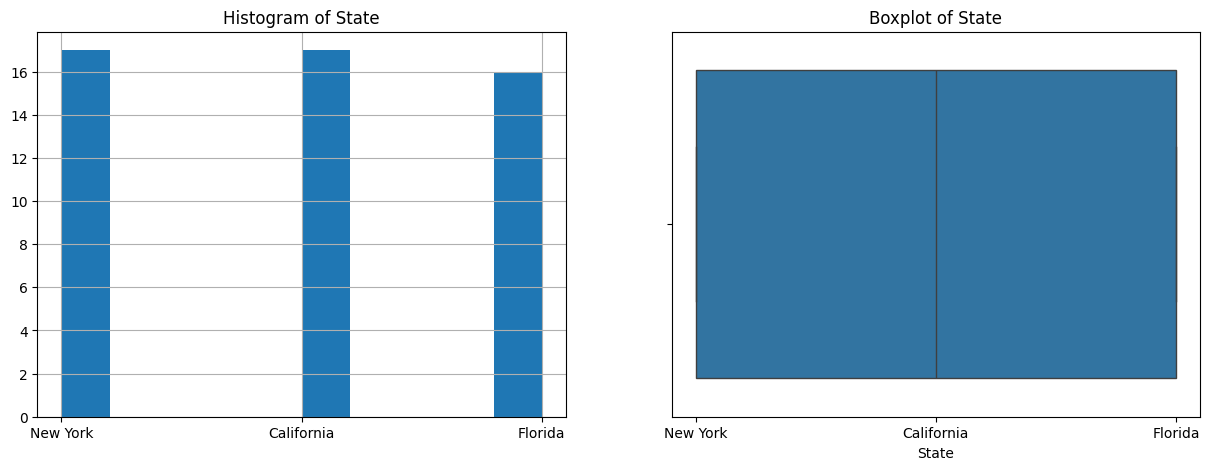

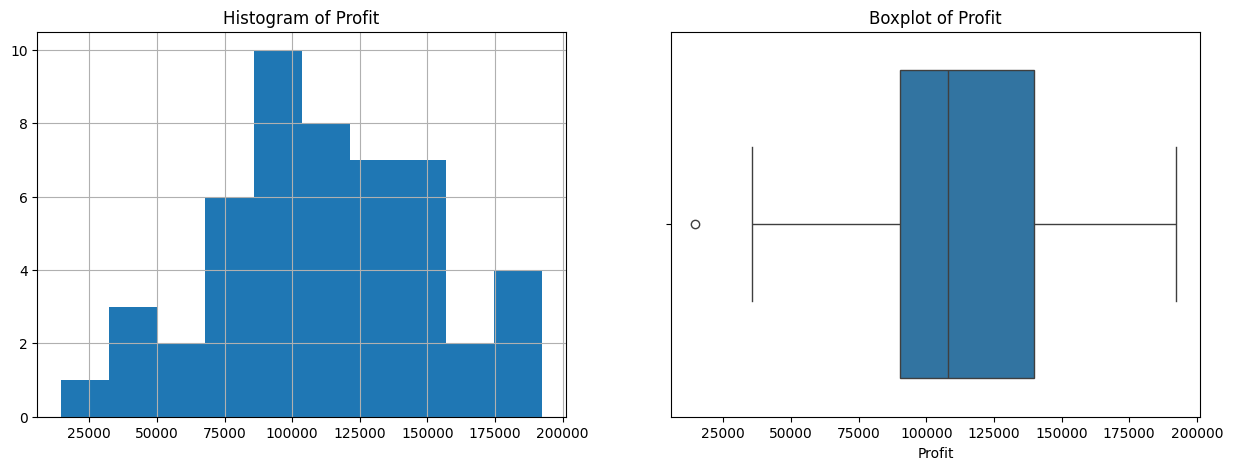

In [ ]:
# prompt: I want to write for loop of list(df) variables of histograms and boxplots
import matplotlib.pyplot as plt
import seaborn as sns
for column in list(df1):
    # Create a figure with two subplots
    plt.figure(figsize=(15, 5))

    # First subplot: histogram
    plt.subplot(1, 2, 1)
    df1[column].hist()
    plt.title(f'Histogram of {column}')

    # Second subplot: boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')

    # Show the plot
    plt.show()


In [ ]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
y = df1["Profit"]
x= df1[['R&D Spend']]

In [ ]:
from sklearn.linear_model import LinearRegression
LR =LinearRegression()
LR.fit(x,y)
y_pred=LR.predict(x)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,y_pred)
RMSE= np.sqrt(mse)
print("Root mean squared error: ", RMSE.round(2))
r2=r2_score(y,y_pred)
print(" r square:",r2.round(2))


Root mean squared error:  9226.1
 r square: 0.95


In [ ]:
x = df1[["R&D Spend" , "Marketing Spend"]]
# B0 + B1R&D Spend + B2Marketing Spend

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
Y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)

RMSE = np.sqrt(mse)
print("Root mean square error : ",RMSE.round(2))

r2 = r2_score(y,y_pred)
print("r square : ",r2.round(2))

Root mean square error :  9226.1
r square :  0.95


In [ ]:
x = df1[["R&D Spend" , "Marketing Spend" , "Administration" ]]
# B0 + B1R&D Spend + B2Marketing Spend + B3Administration

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
Y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)

RMSE = np.sqrt(mse)
print("Root mean square error : ",RMSE.round(2))

r2 = r2_score(y,y_pred)
print("r square : ",r2.round(2))

Root mean square error :  9226.1
r square :  0.95


In [ ]:
# prompt: write code for mlr stats model for df data set

import statsmodels.api as sm

# Define the dependent and independent variables
y = df1['Profit']
X = df1.drop('Profit', axis=1)
X = X.drop('State', axis=1)
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the MLR model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        09:31:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353     

In [ ]:
import numpy as np
print("mean square error:", np.mean(model.resid**2))

mean square error: 78417126.01913084


<Axes: >

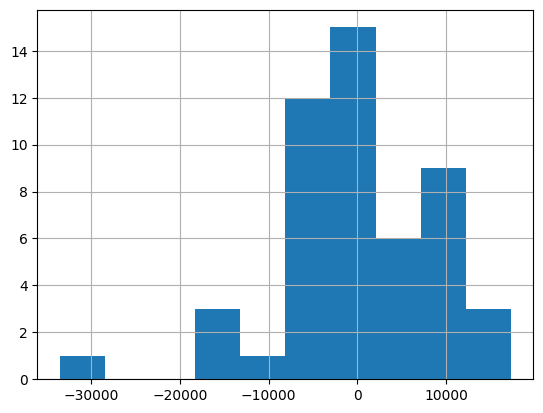

In [ ]:
model.resid.hist()

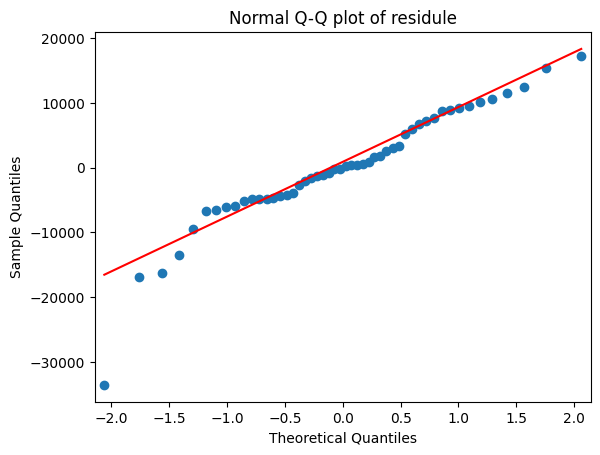

In [ ]:
#Residual Analysis
#Test for normality
import matplotlib.pyplot as plt
import statsmodels.api as sm
qplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residule')
plt.show()

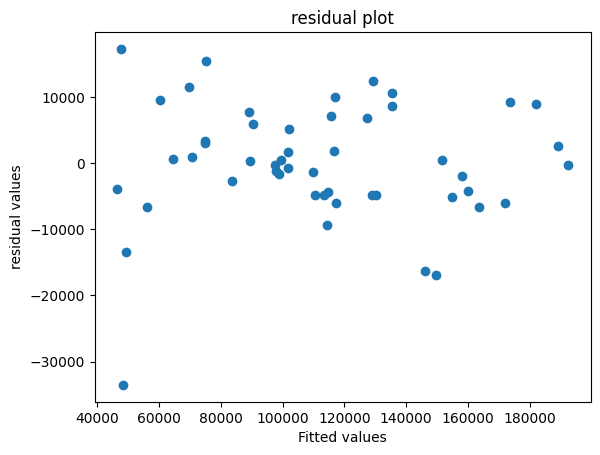

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
plt.title('residual plot')
plt.xlabel("Fitted values")
plt.ylabel("residual values")
plt.show()

In [ ]:
#Model Deletion


model_influence = model.get_influence()
model_influence
(cooks,pvalue)= model_influence.cooks_distance
cooks = pd.DataFrame(cooks)
cooks[0].describe()


count    50.000000
mean      0.022891
std       0.049837
min       0.000009
25%       0.001373
50%       0.004441
75%       0.020875
max       0.288082
Name: 0, dtype: float64

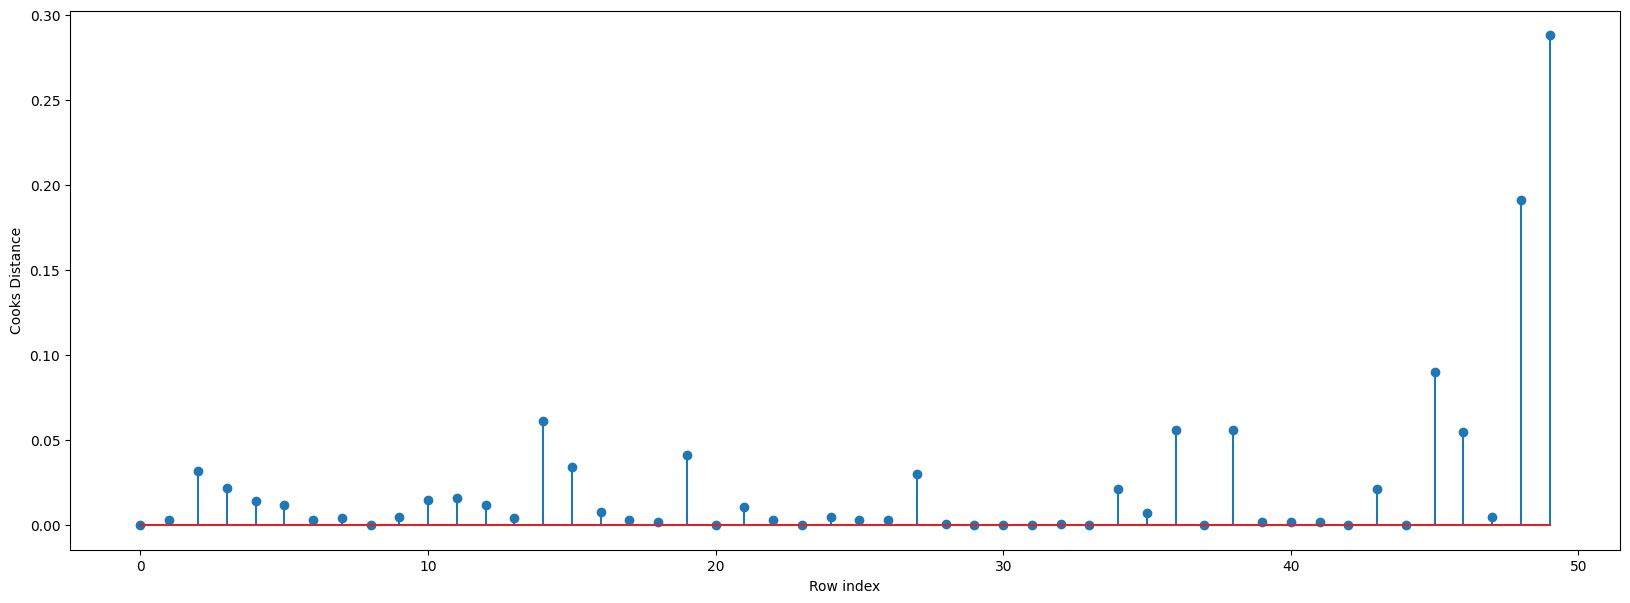

In [ ]:
# plot the influence values
import matplotlib.pyplot as plt
fig =  plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(df1)), np.round(cooks[0], 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

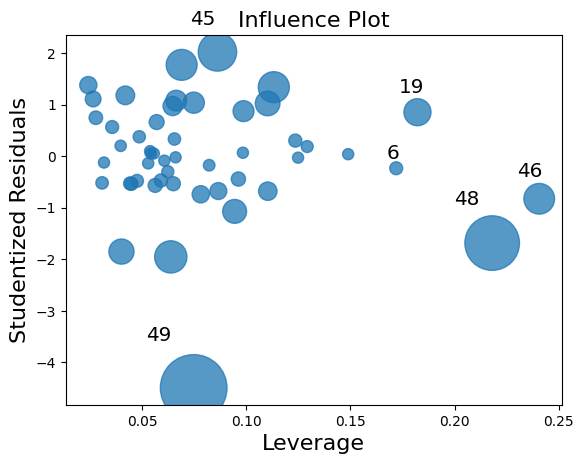

0.36

In [ ]:
## High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


In [ ]:
cooks[0][cooks[0]>leverage_cutoff]


Series([], Name: 0, dtype: float64)

In [ ]:
Y_new=df1['Profit']
X_new=df1.drop(['State'], axis=1)
X_new.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
